DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clever way to find unusual or outlier data points in a group of data. Imagine you have a bunch of points on a map, and you want to find the weird ones that don’t really fit into any group.

Here’s how DBSCAN works:

### Step 1: Select a starting point

Begin by randomly selecting a data point from your dataset.

### Step 2: Define a radius (Epsilon) and minimum number of oints (Min_Samples)

Specify two important values:
* Epsilon (a radius around the selected point).
* Min_Samples (the minimum number of data points that should be within this radius to form a cluster)

### Step 3: Check neighboring points

Examine all data points within the defined radius (Epsilon) around the selected point.

### Step 4: Form a cluster

If there are at least as many data points within the Epsilon radius as specified by Min_Samples, consider the selected point and these nearby points as a cluster.

### Step 5: Expand the cluster

Now, for each point within this newly formed cluster, repeat the process. Check for nearby points within the Epsilon radius.

If additional points are found, add them to the cluster. This process continues iteratively, expanding the cluster until no more points can be added.

### Step 6: Identify outliers (noise) 

Any data points that are not included in any cluster after the expansion process are labeled as outliers or noise. These points do not belong to any cluster.

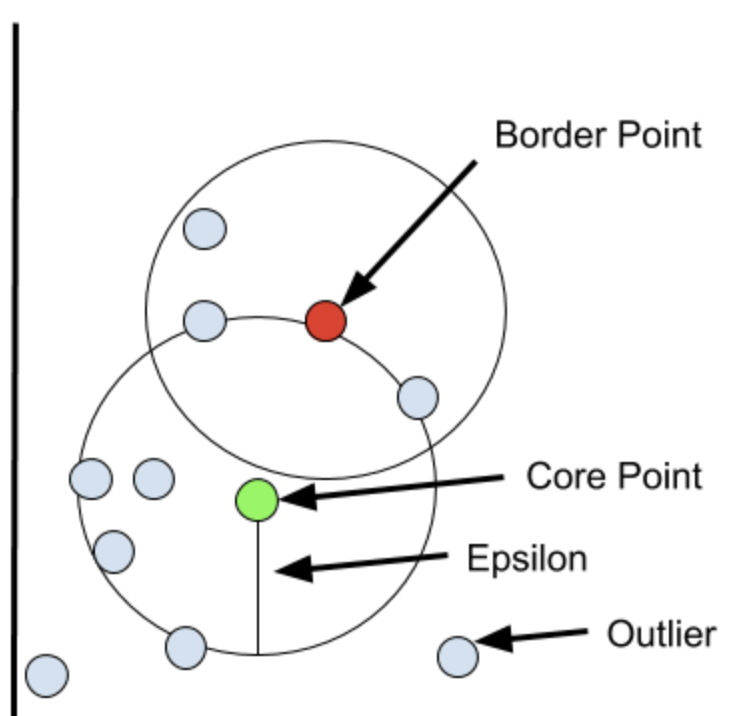

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

/Users/bhushannimje/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Create a synthetic dataset with normal and anomalous data points
n_samples = 300
X, y = make_blobs(n_samples=n_samples, centers=2, random_state=42, cluster_std=1.0)
anomalies = np.array([[5, 5], [6, 6], [7, 7]])

* In this step, a synthetic dataset is generated to illustrate the concept. The dataset is created using the make_blobs function, producing two clusters of data points with some isolated anomalies.
* n_samples determines the total number of data points, and the centers parameter specifies the number of clusters (2, in this case).
* The anomalies variable is an array of manually created anomalous data points.

In [3]:
# Combine the normal data and anomalies
X = np.vstack([X, anomalies])

The normal data and anomalies are combined into a single dataset represented by the X array using np.vstack.

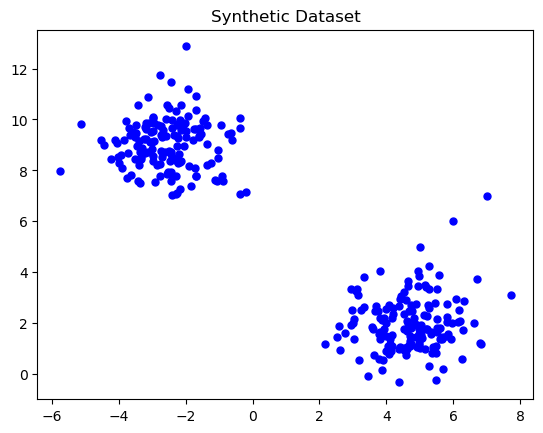

In [4]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=25)
plt.title("Synthetic Dataset")
plt.show()

* The code plots the dataset to provide a visual representation. It uses Matplotlib to create a scatter plot, where normal data points are marked in blue circles.
* The resulting plot visually shows two clusters and some isolated red crosses representing the anomalies.

In [5]:
# Apply DBSCAN for anomaly detection with increased epsilon
dbscan = DBSCAN(eps=1, min_samples=41)  # Increase eps
labels = dbscan.fit_predict(X)

# Anomalies are considered as points with label -1
anomalies = X[labels == -1]

* DBSCAN is applied for anomaly detection using the DBSCAN class from scikit-learn. The parameters eps (epsilon) and min_samples control the algorithm's behavior.
* The eps parameter sets the radius within which points are considered neighbors.
* The min_samples parameter defines the minimum number of points required to form a cluster.
* The code then fits the DBSCAN model to the dataset using fit_predict to obtain cluster labels for each data point.

In [6]:
# Identify anomalies
# Anomalies are considered as points with label -1
anomalies = X[labels == -1]

Anomalies are identified by finding data points labeled as -1. These points do not belong to any cluster and are considered outliers or anomalies.

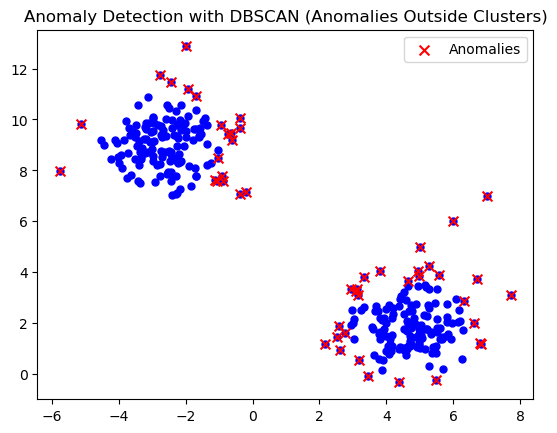

In [7]:
# Visualize the anomalies
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=25)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='x', s=50, label='Anomalies')
plt.title("Anomaly Detection with DBSCAN (Anomalies Outside Clusters)")
plt.legend()
plt.show()

* The code plots the anomalies found by DBSCAN in red crosses on top of the original data points.
* This visualization helps to highlight the anomalies detected by the algorithm.

In [8]:
# Print the identified anomalies
print("Identified Anomalies:")
print(anomalies)

Identified Anomalies:
[[ 4.92965369  4.04857048]
 [ 3.10576467  3.25084651]
 [ 4.98163481  3.84934052]
 [-0.64342311  9.48811905]
 [-0.36525353  9.64820515]
 [-1.10640331  7.61243507]
 [ 6.79306129  1.20582212]
 [-1.92234053 11.20474175]
 [ 6.60460397  2.00843324]
 [ 2.51598311  1.44741466]
 [-0.62301172  9.18886394]
 [ 3.16129259  3.11692373]
 [ 4.65829722  3.649607  ]
 [-0.92318081  7.77647063]
 [ 4.36482714 -0.32875148]
 [ 3.31964563  3.80462845]
 [ 5.2726607   4.24386254]
 [-0.19453906  7.14702094]
 [-1.03130358  8.49601591]
 [ 2.92674431  3.32704206]
 [ 3.82165815  4.06555696]
 [ 5.56605638  3.88258632]
 [-5.75046496  7.98989849]
 [ 6.82968177  1.1648714 ]
 [-0.92998481  9.78172086]
 [-1.68713746 10.91107911]
 [-5.12894273  9.83618863]
 [-0.38704143 10.04675139]
 [ 3.19179449  0.56570591]
 [ 2.16823434  1.17627443]
 [ 6.70062676  3.72851053]
 [-1.99414994 12.86701762]
 [-0.87678632  7.58414475]
 [ 7.71875964  3.0927446 ]
 [-0.74374338  9.41926784]
 [ 2.57243674  1.88404964]
 [ 3.1

The code concludes by printing the coordinates of the identified anomalies, allowing you to see the specific data points classified as anomalies by the DBSCAN algorithm.